Importing libraries & Reading CSV

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart.csv')

Data Preprocessing

In [2]:
# Replace missing values with NaN
data = data.replace('?', np.nan)

In [3]:
# Convert columns to numeric
data = data.apply(pd.to_numeric)

In [4]:
data.fillna(data.mean(), inplace=True)

In [5]:
data.iloc[:, 1] = data.iloc[:, 1].round().astype(int)

In [6]:
data['sex'] = [int(val) for val in data['sex']]

In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,1.0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1.0,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1.0,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,1.0,1,130,236,0,0,174,0,0.0,1,1,2,0


Dependent & Independent variables 

In [42]:
# Split the dataset into features and labels
X = data.drop('target', axis=1)
y = data['target']

Spliting Dataset

In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [45]:
y_train.unique()

array([1, 0], dtype=int64)

Implementing Classifiers

In [46]:
# Implement Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Implement KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Implement Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Implement Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Implement Logistic Regression classifier
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)

# Implement Logistic Bagging
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

Predictions

In [47]:
# Predictions
y_predNB = nb.predict(X_test)
y_predKNN = knn.predict(X_test)
y_predDT = dt.predict(X_test)
y_predRF = rf.predict(X_test)
y_predlr = lr.predict(X_test)
y_predBag = bag_model.predict(X_test)

Evaluating Performance for Naive Bayes

In [48]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predNB):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predNB), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predNB)

,Predicted0,Predicted1
Actual0,21,6
Actual1,3,31


In [49]:
# #heatmap
# def plot2(y_true, y_predNB):
#     labels = unique_labels(y_test)
#     column = [f'Predicted{label}' for label in labels]
#     indices = [f'Actual{label}' for label in labels]
#     table = confusion_matrix(y_true, y_predNB)
#     return sns.heatmap(table, annot=True, fmt='d', cmap='cool')

# plot2(y_test, y_predNB)

In [50]:
print(confusion_matrix(y_test, y_predNB))

[[21  6]
 [ 3 31]]



Naïve Bayes Performance: 
Accuracy: 0.85
Precision: 0.84
Recall: 0.91
F1-score: 0.87
Confusion Matrix Accuracy: 0.85
AUC-ROC: 0.92


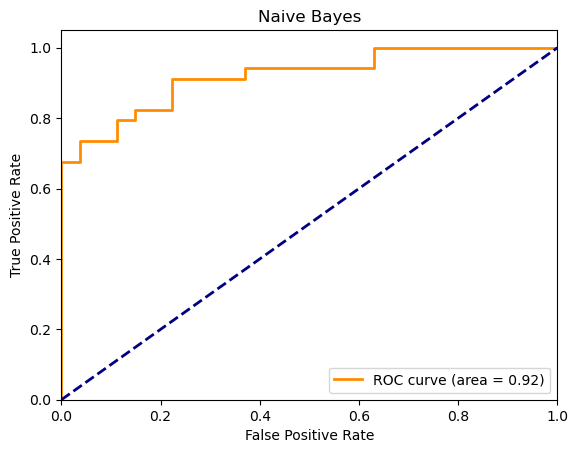

In [51]:
# Evaluate performance NB
accuracyNB = accuracy_score(y_test, y_predNB)
precisionNB = precision_score(y_test, y_predNB)
recallNB = recall_score(y_test, y_predNB)
f1NB = f1_score(y_test, y_predNB)
conf_matrixNB = confusion_matrix(y_test, y_predNB)
conf_accuracyNB = np.trace(conf_matrixNB) / float(np.sum(conf_matrixNB))

# ROC curve
y_probsNB = nb.predict_proba(X_test)[:,1]
fprNB, tprNB, thresholdsNB = roc_curve(y_test, y_probsNB)
roc_aucNB = auc(fprNB, tprNB)

print("\nNaïve Bayes Performance: ")
print(f'Accuracy: {accuracyNB:.2f}')
print(f'Precision: {precisionNB:.2f}')
print(f'Recall: {recallNB:.2f}')
print(f'F1-score: {f1NB:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracyNB:.2f}')
print(f'AUC-ROC: {roc_aucNB:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprNB, tprNB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucNB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Evaluating Performance for K-Nearest Neighbors

In [52]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predKNN):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predKNN), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predKNN)

,Predicted0,Predicted1
Actual0,17,10
Actual1,12,22



KNN Performance: 
Accuracy: 0.64
Precision: 0.69
Recall: 0.65
F1-score: 0.67
Confusion Matrix Accuracy: 0.64
AUC-ROC: 0.67


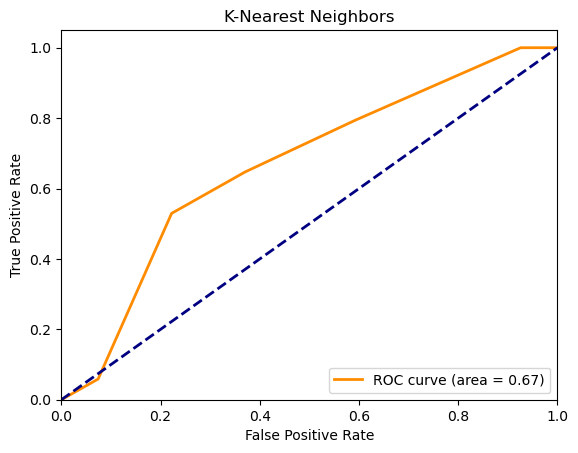

In [53]:
# Evaluate performance KNN
accuracyKNN = accuracy_score(y_test, y_predKNN)
precisionKNN = precision_score(y_test, y_predKNN)
recallKNN = recall_score(y_test, y_predKNN)
f1KNN = f1_score(y_test, y_predKNN)
conf_matrixKNN = confusion_matrix(y_test, y_predKNN)
conf_accuracyKNN = np.trace(conf_matrixKNN) / float(np.sum(conf_matrixKNN))

# ROC curve
y_probsKNN = knn.predict_proba(X_test)[:,1]
fprKNN, tprKNN, thresholdsKNN = roc_curve(y_test, y_probsKNN)
roc_aucKNN = auc(fprKNN, tprKNN)

print("\nKNN Performance: ")
print(f'Accuracy: {accuracyKNN:.2f}')
print(f'Precision: {precisionKNN:.2f}')
print(f'Recall: {recallKNN:.2f}')
print(f'F1-score: {f1KNN:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracyKNN:.2f}')
print(f'AUC-ROC: {roc_aucKNN:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprKNN, tprKNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucKNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

Evaluating Performance for Decision Tree

In [54]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predDT):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predDT), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predDT)

,Predicted0,Predicted1
Actual0,23,4
Actual1,7,27



Decision Tree Performance:
Accuracy: 0.82
Precision: 0.87
Recall: 0.79
F1-score: 0.83
Confusion Matrix Accuracy: 0.82
AUC-ROC: 0.82


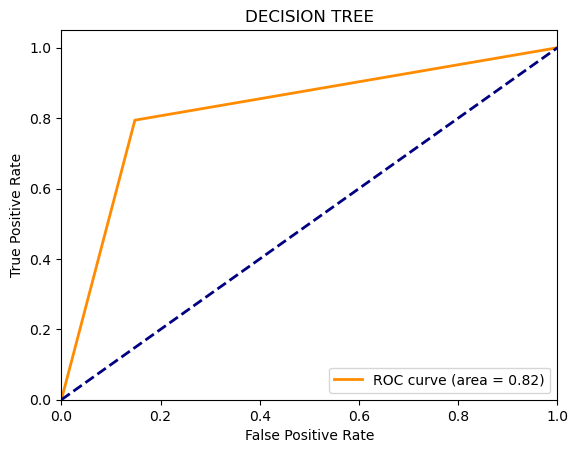

In [55]:
# Evaluate performance DT
accuracyDT = accuracy_score(y_test, y_predDT)
precisionDT = precision_score(y_test, y_predDT)
recallDT = recall_score(y_test, y_predDT)
f1DT = f1_score(y_test, y_predDT)
conf_matrixDT = confusion_matrix(y_test, y_predDT)
conf_accuracyDT = np.trace(conf_matrixDT) / float(np.sum(conf_matrixDT))

# ROC curve
y_probsDT = dt.predict_proba(X_test)[:,1]
fprDT, tprDT, thresholdsDT = roc_curve(y_test, y_probsDT)
roc_aucDT = auc(fprDT, tprDT)

print("\nDecision Tree Performance:")
print(f'Accuracy: {accuracyDT:.2f}')
print(f'Precision: {precisionDT:.2f}')
print(f'Recall: {recallDT:.2f}')
print(f'F1-score: {f1DT:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracyDT:.2f}')
print(f'AUC-ROC: {roc_aucDT:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprDT, tprDT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucDT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DECISION TREE')
plt.legend(loc="lower right")
plt.show()

Evaluating Performance for Random Forest

In [56]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predRF):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predRF), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predRF)

,Predicted0,Predicted1
Actual0,22,5
Actual1,5,29



Random Forest Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.85
F1-score: 0.85
Confusion Matrix Accuracy: 0.84
AUC-ROC: 0.94


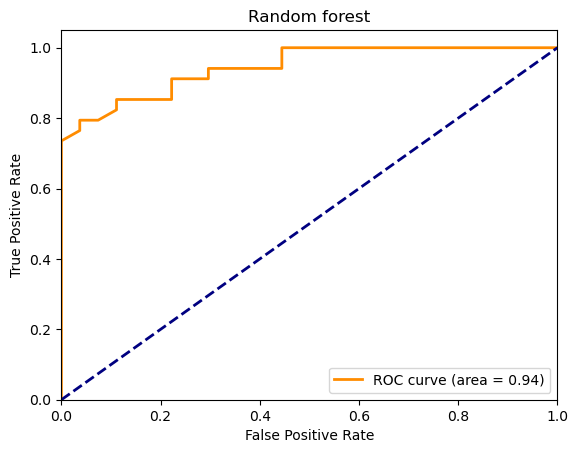

In [57]:
# Evaluate performance Random Forest
accuracyRF = accuracy_score(y_test, y_predRF)
precisionRF = precision_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF)
f1RF = f1_score(y_test, y_predRF)
conf_matrixRF = confusion_matrix(y_test, y_predRF)
conf_accuracyRF = np.trace(conf_matrixRF) / float(np.sum(conf_matrixRF))

# ROC curve
y_probsRF = rf.predict_proba(X_test)[:,1]
fprRF, tprRF, thresholdsRF = roc_curve(y_test, y_probsRF)
roc_aucRF = auc(fprRF, tprRF)

print("\nRandom Forest Performance:")
print(f'Accuracy: {accuracyRF:.2f}')
print(f'Precision: {precisionRF:.2f}')
print(f'Recall: {recallRF:.2f}')
print(f'F1-score: {f1RF:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracyRF:.2f}')
print(f'AUC-ROC: {roc_aucRF:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprRF, tprRF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucRF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest')
plt.legend(loc="lower right")
plt.show()

Evaluating Performance for Logistic Regression

In [58]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predlr):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predlr), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predlr)

,Predicted0,Predicted1
Actual0,21,6
Actual1,3,31


Logistic Regression Performance:
Accuracy: 0.85
Precision: 0.84
Recall: 0.91
F1-score: 0.87
Confusion Matrix Accuracy: 0.85
AUC-ROC: 0.92


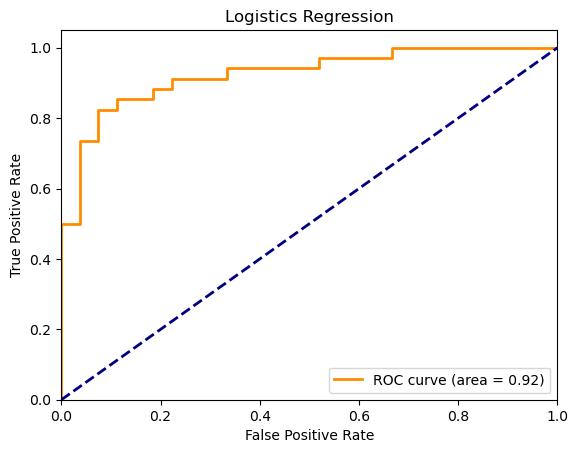

In [59]:
# Evaluate performance Logistic Regression
accuracylr = accuracy_score(y_test, y_predlr)
precisionlr = precision_score(y_test, y_predlr)
recalllr = recall_score(y_test, y_predlr)
f1lr = f1_score(y_test, y_predlr)
conf_matrixlr = confusion_matrix(y_test, y_predlr)
conf_accuracylr = np.trace(conf_matrixlr) / float(np.sum(conf_matrixlr))

# ROC curve
y_probslr = lr.predict_proba(X_test)[:,1]
fprlr, tprlr, thresholdslr = roc_curve(y_test, y_probslr)
roc_auclr = auc(fprlr, tprlr)

print("Logistic Regression Performance:")
print(f'Accuracy: {accuracylr:.2f}')
print(f'Precision: {precisionlr:.2f}')
print(f'Recall: {recalllr:.2f}')
print(f'F1-score: {f1lr:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracylr:.2f}')
print(f'AUC-ROC: {roc_auclr:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprlr, tprlr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistics Regression')
plt.legend(loc="lower right")
plt.show()

Evaluating Performance for Bagging

In [60]:
#unique_labels(y_test)
#combine these labels with a confusion matrix
def plot(y_true, y_predBag):
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predBag), 
                         columns=columns, index=index)
    return table

plot(y_test, y_predBag)

,Predicted0,Predicted1
Actual0,22,5
Actual1,4,30


Bagging Performance:
Accuracy: 0.85
Precision: 0.86
Recall: 0.88
F1-score: 0.87
Confusion Matrix Accuracy: 0.85
AUC-ROC: 0.92


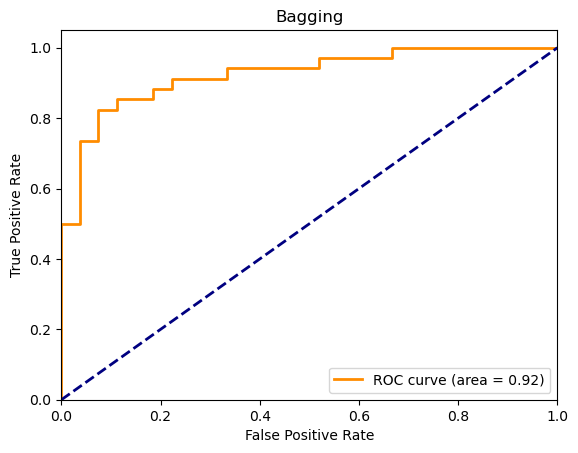

In [61]:
# Evaluate performance Logistic Regression
accuracyBag = accuracy_score(y_test, y_predBag)
precisionBag = precision_score(y_test, y_predBag)
recallBag = recall_score(y_test, y_predBag)
f1Bag = f1_score(y_test, y_predBag)
conf_matrixBag = confusion_matrix(y_test, y_predBag)
conf_accuracyBag = np.trace(conf_matrixBag) / float(np.sum(conf_matrixBag))

# ROC curve
y_probsBag = lr.predict_proba(X_test)[:,1]
fprBag, tprBag, thresholdsBag = roc_curve(y_test, y_probsBag)
roc_aucBag = auc(fprBag, tprBag)

print("Bagging Performance:")
print(f'Accuracy: {accuracyBag:.2f}')
print(f'Precision: {precisionBag:.2f}')
print(f'Recall: {recallBag:.2f}')
print(f'F1-score: {f1Bag:.2f}')
print(f'Confusion Matrix Accuracy: {conf_accuracyBag:.2f}')
print(f'AUC-ROC: {roc_aucBag:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fprBag, tprBag, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucBag)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging')
plt.legend(loc="lower right")
plt.show()

In [62]:
bag_model.oob_score_

0.7851239669421488

In [63]:
#bag_model.score(X_test, y_test) #same as accuracy

<Figure size 1200x800 with 0 Axes>

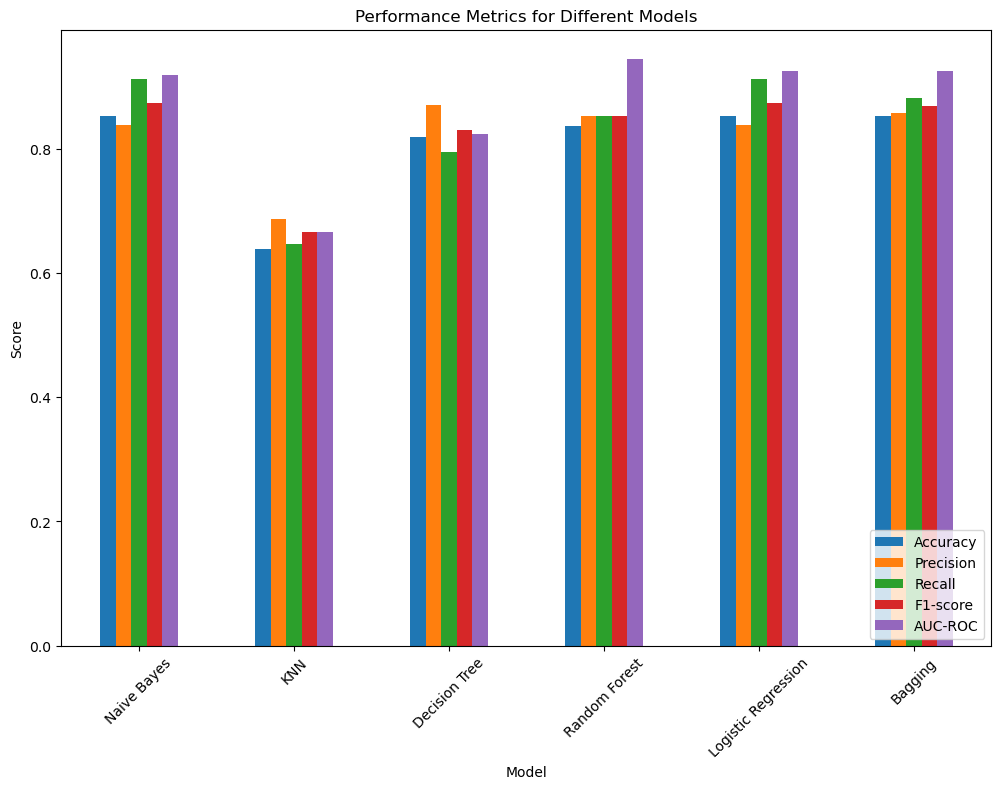

In [64]:
# Plotting the metrics
metrics = {'Model': ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Bagging'], 
           'Accuracy': [accuracyNB, accuracyKNN, accuracyDT, accuracyRF, accuracylr, accuracyBag],
           'Precision': [precisionNB, precisionKNN, precisionDT, precisionRF, precisionlr, precisionBag], 
           'Recall': [recallNB, recallKNN, recallDT, recallRF, recalllr, recallBag], 
           'F1-score': [f1NB, f1KNN, f1DT, f1RF, f1lr, f1Bag], 
           'AUC-ROC': [roc_aucNB, roc_aucKNN, roc_aucDT, roc_aucRF, roc_auclr, roc_aucBag]}
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()